In [ ]:
#@title Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense, GlobalAveragePooling1D, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dropout
from keras.models import Sequential


In [ ]:
#@title Load data
# import json

# def parse_data(file):
#     for l in open(file,'r'):
#         yield json.loads(l)

# data = list(parse_data('/content/drive/My Drive/News-Article-Sarcasm-detection/data/Sarcasm_Headlines_Dataset.json'))
# sentences = [] 
# labels = []
# urls = []
# for item in data:
#     sentences.append(item['headline'])
#     labels.append(item['is_sarcastic'])

# df = pd.DataFrame(columns={'sentences','labels','urls'})
# df['sentences'] = sentences
# df['labels'] = labels
df = pd.read_csv('/content/drive/My Drive/News-Article-Sarcasm-detection/data/Sarcasm_Headlines_Dataset.csv')

In [ ]:
#@title Hyperparameters

embedding_dim = 100
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [ ]:
df

,Unnamed: 0,sentences,labels,urls
0,0,former versace store clerk sues over secret 'b...,0,https://www.huffingtonpost.com/entry/versace-b...
1,1,the 'roseanne' revival catches up to our thorn...,0,https://www.huffingtonpost.com/entry/roseanne-...
2,2,mom starting to fear son's web series closest ...,1,https://local.theonion.com/mom-starting-to-fea...
3,3,"boehner just wants wife to listen, not come up...",1,https://politics.theonion.com/boehner-just-wan...
4,4,j.k. rowling wishes snape happy birthday in th...,0,https://www.huffingtonpost.com/entry/jk-rowlin...
...,...,...,...,...
26704,26704,american politics in moral free-fall,0,https://www.huffingtonpost.com/entry/american-...
26705,26705,america's best 20 hikes,0,https://www.huffingtonpost.com/entry/americas-...
26706,26706,reparations and obama,0,https://www.huffingtonpost.com/entry/reparatio...
26707,26707,israeli ban targeting boycott supporters raise...,0,https://www.huffingtonpost.com/entry/israeli-b...


In [ ]:
#@title Train Test Split
sentences = list(df['sentences'])
labels = list(df['labels'])
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
#@title tokenization, padding
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
#@title Convert to numpy array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

#### Basic Approach

In [ ]:
#@title Model
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 30
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded, testing_labels), verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 6709 samples
Epoch 1/30
 - 2s - loss: 0.5772 - accuracy: 0.6867 - val_loss: 0.3990 - val_accuracy: 0.8331
Epoch 2/30
 - 2s - loss: 0.3139 - accuracy: 0.8732 - val_loss: 0.3414 - val_accuracy: 0.8554
Epoch 3/30
 - 2s - loss: 0.2349 - accuracy: 0.9080 - val_loss: 0.3418 - val_accuracy: 0.8520
Epoch 4/30
 - 2s - loss: 0.1895 - accuracy: 0.9268 - val_loss: 0.3596 - val_accuracy: 0.8499
Epoch 5/30
 - 2s - loss: 0.1576 - accuracy: 0.9414 - val_loss: 0.4018 - val_accuracy: 0.8454
Epoch 6/30
 - 2s - loss: 0.1339 - accuracy: 0.9528 - val_loss: 0.4171 - val_accuracy: 0.8477
Epoch 7/30
 - 2s - loss: 0.1139 - accuracy: 0.9599 - val_loss: 0.4559 - val_accuracy: 0.8413
Epoch 8/30
 - 2s - loss: 0.0975 - accuracy: 0.9674 - val_loss: 0.4980 - val_accuracy: 0.8375
Epoch 9/30
 - 2s - loss: 0.0853 - accuracy: 0.9720 - val_loss: 0.5420 - val_accuracy: 0.8359
Epoch 10/30
 - 2s - loss: 0.0724 - accuracy: 0.9768 - val_loss: 0.5910 - val_accuracy: 0.8331
Epoch 11/30
 - 2s - 

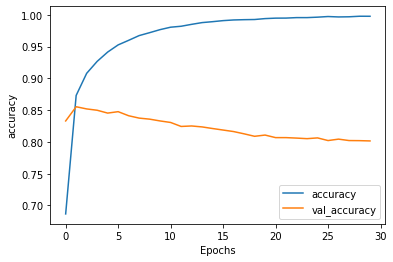

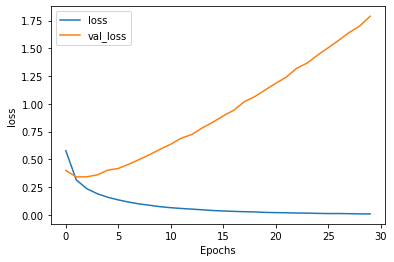

In [ ]:
#@title Vizualization

import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.9990010e-01]
 [5.9752193e-07]]


#### Sequence Models

In [ ]:
#@title LSTM Model
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_13 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 25        
Total params: 204,593
Trainable params: 204,593
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 30
history_lstm = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded, testing_labels), verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 6709 samples
Epoch 1/30
 - 26s - loss: 0.4050 - accuracy: 0.8022 - val_loss: 0.3324 - val_accuracy: 0.8530
Epoch 2/30
 - 24s - loss: 0.2130 - accuracy: 0.9136 - val_loss: 0.3381 - val_accuracy: 0.8578
Epoch 3/30
 - 24s - loss: 0.1286 - accuracy: 0.9524 - val_loss: 0.4147 - val_accuracy: 0.8502
Epoch 4/30
 - 24s - loss: 0.0746 - accuracy: 0.9744 - val_loss: 0.5382 - val_accuracy: 0.8331
Epoch 5/30
 - 24s - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.6228 - val_accuracy: 0.8389
Epoch 6/30
 - 24s - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.8222 - val_accuracy: 0.8350
Epoch 7/30
 - 24s - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.8769 - val_accuracy: 0.8307
Epoch 8/30
 - 24s - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.8615 - val_accuracy: 0.8350
Epoch 9/30
 - 24s - loss: 0.0122 - accuracy: 0.9959 - val_loss: 1.1419 - val_accuracy: 0.8305
Epoch 10/30
 - 24s - loss: 0.0114 - accuracy: 0.9962 - val_loss: 0.9853 - val_accuracy: 0.8329
Epoch 11/3

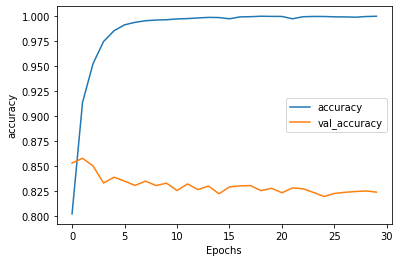

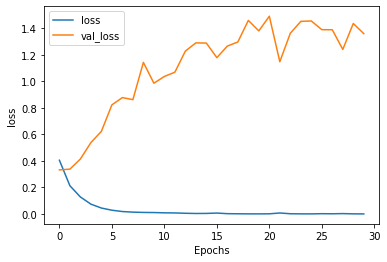

In [ ]:
#@title Vizualization LSTM

plot_graphs(history_lstm, "accuracy")
plot_graphs(history_lstm, "loss")



In [ ]:
#@title Multilayer GRU

# Similar to before, we define the size the convolutions and the effetct will be same 
# words will be grouped in size of filter and convolutions could be learned to map classification to desired output
model = Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model.add(Conv1D(128,5,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 128)           10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 25        
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 30
history_cnn = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded, testing_labels), verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 6709 samples
Epoch 1/30
 - 4s - loss: 0.4458 - accuracy: 0.7775 - val_loss: 0.3558 - val_accuracy: 0.8422
Epoch 2/30
 - 4s - loss: 0.2238 - accuracy: 0.9098 - val_loss: 0.3814 - val_accuracy: 0.8417
Epoch 3/30
 - 4s - loss: 0.1094 - accuracy: 0.9620 - val_loss: 0.4627 - val_accuracy: 0.8420
Epoch 4/30
 - 4s - loss: 0.0428 - accuracy: 0.9875 - val_loss: 0.6313 - val_accuracy: 0.8398
Epoch 5/30
 - 4s - loss: 0.0156 - accuracy: 0.9963 - val_loss: 0.7594 - val_accuracy: 0.8313
Epoch 6/30
 - 4s - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.8443 - val_accuracy: 0.8296
Epoch 7/30
 - 4s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.9740 - val_accuracy: 0.8350
Epoch 8/30
 - 4s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.0351 - val_accuracy: 0.8341
Epoch 9/30
 - 4s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.0956 - val_accuracy: 0.8346
Epoch 10/30
 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.1655 - val_accuracy: 0.8268
Epoch 11/30
 - 4s - 

In [ ]:
#@title Vizualization GRU

plot_graphs(history_cnn, "accuracy")
plot_graphs(history_cnn, "loss")



#### GloVe Embeddings

In [ ]:
#@title Load Embeddings
embedding_index = {}
with open("/content/drive/My Drive/IEEEBigMM/#METOO/Glove-Embedding/glove.6B.100d.txt") as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype = 'float32')
    embedding_index[word] = coefs
  
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector



In [ ]:
model = Sequential()
model.add(Embedding(vocab_size+1, embedding_dim, input_length= max_length, weights=[embedding_matrix], trainable=False))
model.add(Dropout(0,2))
model.add(Conv1D(64,5,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 100)           2563800   
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,628,953
Trainable params: 65,153
Non-trainable params: 2,563,800
_______________________________________

In [ ]:
history_glove = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/10
 - 17s - loss: 0.5078 - accuracy: 0.7447 - val_loss: 0.4172 - val_accuracy: 0.8070
Epoch 2/10
 - 10s - loss: 0.3460 - accuracy: 0.8503 - val_loss: 0.3828 - val_accuracy: 0.8292
Epoch 3/10
 - 10s - loss: 0.2532 - accuracy: 0.8950 - val_loss: 0.4102 - val_accuracy: 0.8298
Epoch 4/10
 - 10s - loss: 0.1901 - accuracy: 0.9254 - val_loss: 0.4437 - val_accuracy: 0.8293
Epoch 5/10
 - 10s - loss: 0.1337 - accuracy: 0.9492 - val_loss: 0.5398 - val_accuracy: 0.8205
Epoch 6/10
 - 10s - loss: 0.1003 - accuracy: 0.9627 - val_loss: 0.5497 - val_accuracy: 0.8129
Epoch 7/10
 - 10s - loss: 0.0736 - accuracy: 0.9728 - val_loss: 0.6480 - val_accuracy: 0.8150
Epoch 8/10
 - 10s - loss: 0.0625 - accuracy: 0.9774 - val_loss: 0.7092 - val_accuracy: 0.8156
Epoch 9/10
 - 10s - loss: 0.0545 - accuracy: 0.9794 - val_loss: 0.7746 - val_accuracy: 0.8182
Epoch 10/10
 - 10s - loss: 0.0484 - accuracy: 0.9822 - val_loss: 0.9127 - val_accuracy: 0.8110
